<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/notebooks/03_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the clean data

In [2]:
# Mounting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project


In [1]:
# NEW LOCATION EPPES. PLEASE REPLACE WHERE NECESSARY

import pandas as pd

eppes_new_loc = pd.read_csv('..\data\processed\eppes_cleaned.csv')

In [3]:
# Importing the data
import pandas as pd
eppes_cleaned = pd.read_csv('eppes_cleaned.csv')
eppes_cleaned = eppes_cleaned.drop(eppes_cleaned.columns[0], axis = 1)
eppes_cleaned

,q1.1,q1.2,q1.3,q1.4,q1.5,q1.6,q1.7,q1.8,q1.9,q1.10,...,d43a,d43b,d46.8,d60,d62_1,d62_2,d63,d72_1,d72_2,d77
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,3.0,6.0,1.0,3.0,3.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,3.0,2.0,6.0,3.0,2.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,6.0,6.0,3.0,4.0,2.0,2.0
27462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,6.0,6.0,4.0,2.0,2.0,2.0


In [4]:
eppes_cleaned.dtypes.value_counts()

float64    311
dtype: int64

In [2]:
# NEW LOCATION. PLEASE REPLACE WHERE NECESSARY

columns_analysis = pd.read_excel(r'..\data\interim\Drop_Columns_categorical.xlsx')
columns_analysis = columns_analysis.drop(columns_analysis.columns[[0]], axis = 1)

In [5]:
# Import Excel sheet containing column indeces to be dropped

columns_analysis = pd.read_excel(r'Drop_Columns_categorical.xlsx')
columns_analysis = columns_analysis.drop(columns_analysis.columns[[0]], axis = 1)

In [6]:
# Create list of names of categorical columns 

col_names_categorical = []

for i in range(872):
  if columns_analysis.iloc[i, 3] == 'categorical':
    col_names_categorical.append(columns_analysis.iloc[i, 1])

In [7]:
# Change datatype of categorical variables to object

eppes_cleaned[col_names_categorical] = eppes_cleaned[col_names_categorical].astype('object')

eppes_cleaned.dtypes.value_counts()

object     167
float64    144
dtype: int64

In [8]:
# For test purposes: reduce to first X rows
eppes_cleaned = eppes_cleaned[:15000]
len(eppes_cleaned)

# Examining data types 
eppes_cleaned.dtypes.value_counts() # only floats - fix

object     167
float64    144
dtype: int64

**Setting train and test data**

In [9]:
# Define X and y
print(eppes_cleaned.head())
X = eppes_cleaned.drop(columns='qg1') # reference variable which contains voted y/n
y = eppes_cleaned['qg1'] # reference variable which contains voted y/n

# 80/20 train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=123)

   q1.1  q1.2  q1.3  q1.4  q1.5  q1.6  q1.7  q1.8  q1.9  q1.10  ...  d43a  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
1   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   2.0   

   d43b  d46.8  d60  d62_1  d62_2  d63  d72_1  d72_2  d77  
0   1.0    1.0  1.0    3.0    6.0  1.0    3.0    3.0  2.0  
1   1.0    1.0  3.0    2.0    6.0  3.0    2.0    2.0  3.0  
2   2.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  1.0  
3   1.0    1.0  2.0    1.0    1.0  3.0    2.0    2.0  1.0  
4   1.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  3.0  

[5 rows x 311 columns]


In [10]:
from sklearn.preprocessing import LabelEncoder

X_train
y_train

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train

y_train_df = pd.DataFrame(data=y_train)
y_train_df.value_counts(normalize=True)

0    0.605417
1    0.394583
dtype: float64

**Defining the pre-processing steps** 

All categorical variables are OneHotEncoded. Age is the only truly continuous variable in our dataset, which is already normally distributed and positive. Thus, we do not employ any transformation of the numerical variables. 

In [11]:
# Setting up pre-processing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Identify all categorical variables by data type
categorical_X_features = X_train.select_dtypes(include=['object', 'bool']).columns

# OneHotEncode all categorical variables
categorical_transformer = OneHotEncoder(handle_unknown="error")

preprocessor = ColumnTransformer(remainder = 'passthrough', # remainder = passthrough for numerical variables to be kept unchanged
    transformers=[
        ("cat", categorical_transformer, categorical_X_features)]
)

In [12]:
# Inspect the number of variables after pre-processing
# Fit the pipeline to the training data
preprocessor.fit(X_train)
X_train_ = preprocessor.transform(X_train)

X_train_df = pd.DataFrame(data=X_train_)
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,925,926,927,928,929,930,931,932,933,934
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.323667,0.540917,0.107583,0.026083,0.001750,0.267583,0.522917,0.207417,0.002083,0.179917,...,0.027333,0.040500,0.147417,0.035000,0.044083,1.507750,52.089083,2.123500,0.248833,0.808250
std,0.467894,0.498344,0.309866,0.159390,0.041798,0.442718,0.499495,0.405473,0.045598,0.384134,...,0.163060,0.197137,0.354536,0.183787,0.205289,0.499961,18.470867,1.089042,0.700683,0.393694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,53.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,67.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,98.000000,20.000000,20.000000,1.000000


### Model 1 (Baseline): Logistic Regression

In [15]:
# Define a pipeline with pre-processing and a Logistic Regression
logistic_regression_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter = 200))]
)

In [16]:
# Tune the hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define parameters for optimisiation
solvers = ['lbfgs', 'liblinear', 'newton-cg'] # algorithms used to solve the optimization problem
penalty = ['l2'] # specifying penaltty - limited to l2 as other penalties not compatible with all solvers
c_values = [0.0001, 0.001, 0.01, 0.1] # inverse of regularization strength (smaller values = stronger regularization)

param_grid = {
    'classifier__solver':solvers, 
    'classifier__penalty':penalty,
    'classifier__C':c_values}

# Set-up repeated, stratified cross-validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)

# Define GridSearchCV with F1 as comparison metrics
grid_search = GridSearchCV(estimator=logistic_regression_pipe, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

# Fit the grid search model
grid_result = grid_search.fit(X_train, y_train)

# Print the mean test scrore (F1), sd and the parameters that were used
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793655 using {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.793420 (0.010879) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.793655 (0.010968) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.793481 (0.011070) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.786915 (0.011901) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.787034 (0.011784) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.787020 (0.011777) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.782515 (0.011503) with: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.782343 (0.011968) with: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinea

In [17]:
# Document the best model specification as a vector
from joblib import dump, load

estimator = grid_result.best_estimator_
dump(estimator, "best-logistic-regression.joblib")

['best-logistic-regression.joblib']

In [18]:
# Get classification report on best performing logistic regression model
from sklearn.metrics import classification_report

best_logistic_regression = load("best-logistic-regression.joblib")
best_logistic_regression.fit(X_train, y_train)

y_pred_logistic = best_logistic_regression.predict(X_train) # need to change to X_test in final run
print(classification_report(y_train, y_pred_logistic)) 

### TBD whether to report visualised classification report - currently somehow the smaller class is not displayed
# from yellowbrick.classifier import ClassificationReport
# visualizer = ClassificationReport(best_logistic_regression, support = True)
# visualizer.fit(X_train, y_train)  
# visualizer.score(X_test, y_test)
# visualizer.poof()

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7265
           1       0.85      0.77      0.81      4735

    accuracy                           0.86     12000
   macro avg       0.86      0.84      0.85     12000
weighted avg       0.86      0.86      0.85     12000



### Model 2: Naive Bayes

In [19]:
# Bernoulli NB seems most suitable, as we OneHotEncode all our ordinal data
# Alternatives are less relevant, e.g. GaussianNB is for continuous features and CategoricalNB for categorical features

from sklearn.naive_bayes import BernoulliNB

# Define a pipeline with pre-processing and a Bernoulli Naive Bayes
naive_bayes_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", BernoulliNB())]
)

### Model 3: Support Vector Machine (SVM) 

In [22]:
# Define a pipeline with pre-processing and SVM
from sklearn.svm import SVC

SVM_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

### Model 4: Random Forest

In [15]:
# Define a pipeline with pre-processing and Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state = 123))])

In [5]:
# Define parameters for optimisiation
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5, 10] # minimum sample number to split a node
min_samples_leaf = [1, 2, 4] # minimum sample number that can be stored in a leaf node

random_grid = {
    'classifier__n_estimators':n_estimators, 
    'classifier__max_features':max_features,
    'classifier__max_depth':max_depth,
    'classifier__min_samples_split':min_samples_split,
    'classifier__min_samples_leaf': min_samples_leaf}

# Set-up repeated, stratified cross-validation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123) # set n_splits to 5 for faster computation, tbd if increase for final run

# Define GridSearchCV with F1 as comparison metrics
rf_random = RandomizedSearchCV(estimator = random_forest_pipe, param_distributions=random_grid, cv=cv, n_iter=20, random_state=123, n_jobs = -1) 
# set number of iterations to 5 from the default of 10 for faster computation 

# Fit the grid search model
rf_random_result = rf_random.fit(X_train, y_train)

# Print the mean test scrore (F1), sd and the parameters that were used
print("Best: %f using %s" % (rf_random_result.best_score_, rf_random_result.best_params_))
means = rf_random_result.cv_results_['mean_test_score']
stds = rf_random_result.cv_results_['std_test_score']
params = rf_random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [4]:
# Document the best model specification as a vector
estimator = rf_random_result.best_estimator_
dump(estimator, "best-random-forest.joblib")

NameError: ignored

**Comparing the best performing models**

In [7]:
# Compare best performing models
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load all the model specifications
models = []
models.append(('Logistic Regression', load("best-logistic-regression.joblib")))
models.append(('Naive Bayes', naive_bayes_pipe))
models.append(('SVM', load("best-SVM.joblib")))

# Create lists for scores and model names. Comparison metric F1
results = []
names = []
scoring = 'f1'

for name, model in models:
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
  cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring) # change to x test and y test in final run
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

NameError: ignored

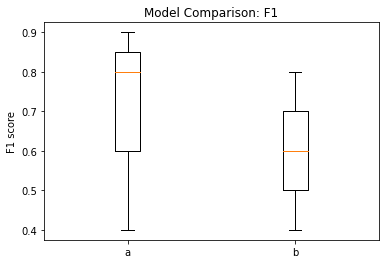

In [9]:
# Plot the model performance as boxplot
# TBD: Have MCC in the same boxplot, make nicer

x1 = [0.9, 0.8, 0.4]
x2 = [0.8, 0.4, 0.6]
names = ["a", "b", "c"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([x1, x2])
ax.set_title("Model Comparison: F1")
ax.set_xticklabels(names)
ax.set_ylabel("F1 score")
plt.show()